In [ ]:
#This code is an example of the RF algorithm
import pandas as pd
import statistics
import math
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import pylab as rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("brasil.csv")
gases = pd.read_csv("gases.csv")
gases_diff = pd.read_csv('gases_estacionarios_log_diff.csv')

In [3]:
df=df.drop(['Unnamed: 0'], axis=1)
df

,data,temp
0,1961-01-01,24.042850
1,1961-02-01,23.654947
2,1961-03-01,23.456133
3,1961-04-01,22.627722
4,1961-05-01,21.792189
...,...,...
739,2022-08-01,21.363998
740,2022-09-01,22.228985
741,2022-10-01,23.117392
742,2022-11-01,23.330244


In [5]:
gases=gases.drop(['Unnamed: 0'], axis=1)
gases=gases.drop(['data'], axis=1)
gases

,co2,ch4,n2o
0,316.910000,1.200900,0.289900
1,316.970833,1.202367,0.289925
2,317.031667,1.203833,0.289950
3,317.092500,1.205300,0.289975
4,317.153333,1.206767,0.290000
...,...,...,...
739,417.259091,1.904928,0.335461
740,417.691818,1.906307,0.335536
741,418.124545,1.907685,0.335610
742,418.557273,1.909063,0.335685


In [6]:
X= gases
X

,co2,ch4,n2o
0,316.910000,1.200900,0.289900
1,316.970833,1.202367,0.289925
2,317.031667,1.203833,0.289950
3,317.092500,1.205300,0.289975
4,317.153333,1.206767,0.290000
...,...,...,...
739,417.259091,1.904928,0.335461
740,417.691818,1.906307,0.335536
741,418.124545,1.907685,0.335610
742,418.557273,1.909063,0.335685


In [7]:
y=df['temp'].values

In [8]:
X.shape

(744, 3)

In [9]:
y.shape

(744,)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_t = scaler.transform(X)

In [11]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
RobustScaler()
Xtrans = transformer.transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.2, random_state=18)
X_train.shape

(595, 3)

In [13]:
from sklearn.model_selection import GridSearchCV
import datetime

In [14]:
## Define Grid 
grid1 = { 
     'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [200,400,1000,1500],
    'max_features': [0.2,0.1,0.3,'sqrt','log2'],
    'max_depth' : [30,50,100,200],
    'random_state' : [18]
}## show start time
#print(datetime.now())## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5)
CV_rfr.fit(X_train, y_train)## show end time
#print(datetime.now())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [30, 50, 100, 200],
                         'max_features': [0.2, 0.1, 0.3, 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 1000, 1500],
                         'random_state': [18]})

In [15]:
CV_rfr.best_score_

0.6840868310733649

In [16]:
rf_best = CV_rfr.best_estimator_
rf_best[0]

DecisionTreeRegressor(criterion='poisson', max_depth=50, max_features=0.2,
                      random_state=645852458)

In [14]:
#Para o loop: length test = 0.3:
#rf = RandomForestRegressor(criterion='poisson',n_estimators = 500, max_features = 0.2, max_depth = 50,bootstrap=True, random_state = 18).fit(X_train, y_train)
rf = RandomForestRegressor(criterion='poisson',n_estimators = 500, max_features = 0.2, max_depth = 50,bootstrap=True, random_state = 18).fit(X_train, y_train)
prediction_train = rf.predict(X_train)
prediction_test = rf.predict(X_test)

In [15]:
mse = mean_squared_error(y_train, prediction_train)
rmse = mse**.5
r2 = r2_score(y_train, prediction_train)
print(mse)
print(rmse)
print(r2)

0.05508888322069734
0.23471021115558083
0.9681760796877098


In [16]:
mse = mean_squared_error(y_test, prediction_test)
rmse = mse**.5
r2 = r2_score(y_test, prediction_test)
print(mse)
print(rmse)
print(r2)
from scipy.stats import pearsonr
r = pearsonr(y_test, prediction_test)
print(r)

0.4432111664135589
0.6657410655904883
0.7235413057790362
PearsonRResult(statistic=0.8552864586493152, pvalue=8.128278629129642e-44)


In [25]:
prediction = rf.predict(Xtrans)

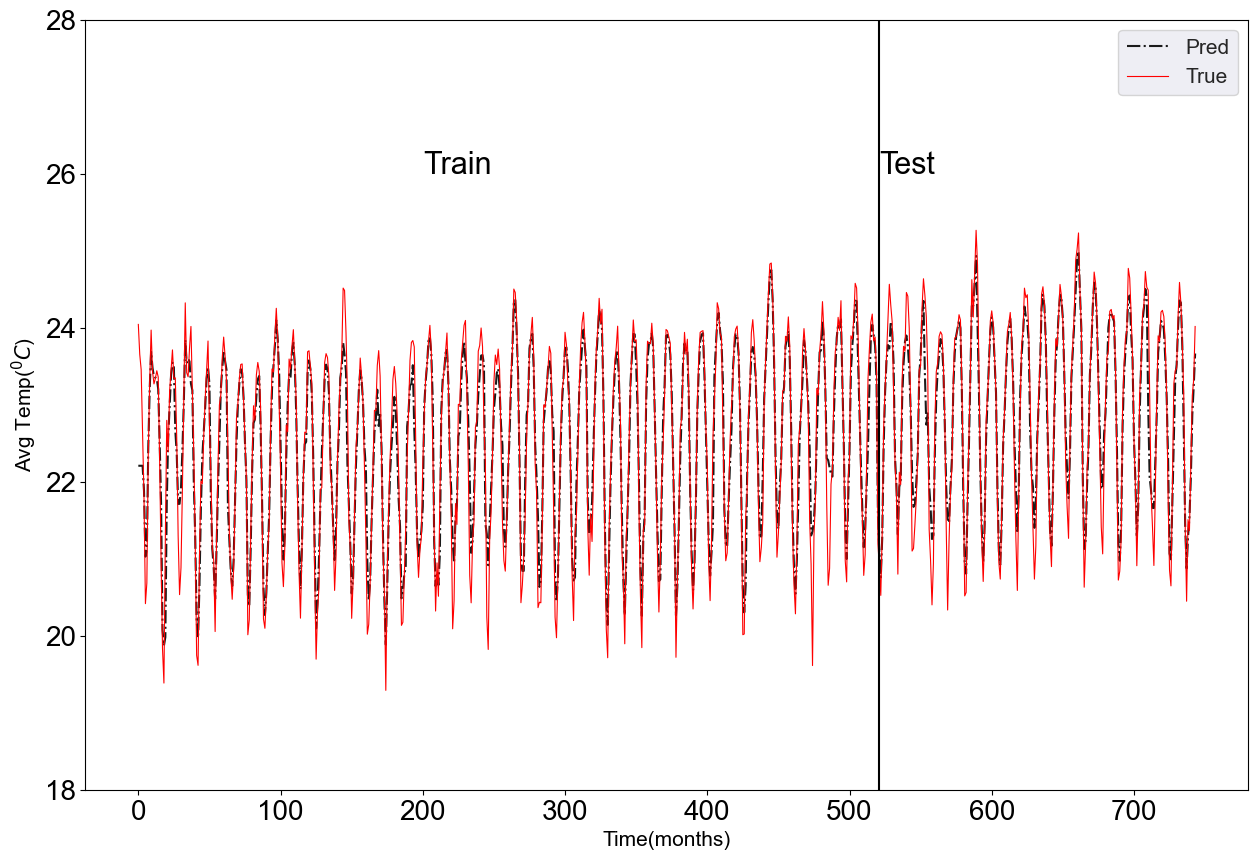

In [26]:
plt.figure(figsize=(15, 10))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
test_size=0.3
plt.plot(prediction, 'k-.',lw=1.5,label = 'Pred')
plt.plot(y, color='red',lw=0.8, label='True')
plt.axvline(x = (1-test_size)*len(y), color = 'black',linestyle = "-")
plt.text(200, 26, 'Train', fontsize = 22)
plt.text((1-test_size)*len(y), 26, 'Test', fontsize = 22)
plt.ylabel("Avg Temp($^0C$)", fontsize = 15) 
plt.xlabel("Time(months)",fontsize = 15)
plt.ylim(18,28)
bbox_to_anchor=(1.,1.)
sns.set(style='darkgrid')
plt.legend(fontsize=15)
plt.show()

In [27]:
test_size=0.2
(1-test_size)*len(y)

595.2

In [28]:
df

,data,temp
0,1961-01-01,24.042850
1,1961-02-01,23.654947
2,1961-03-01,23.456133
3,1961-04-01,22.627722
4,1961-05-01,21.792189
...,...,...
739,2022-08-01,21.363998
740,2022-09-01,22.228985
741,2022-10-01,23.117392
742,2022-11-01,23.330244


In [29]:
df1 = pd.DataFrame(df)
df2 = pd.DataFrame(prediction)
df2.rename({0:'Pred'}, axis=1, inplace=True)
erro_abs= np.abs(df1['temp']-df2['Pred'])
result = pd.concat([df1, df2,erro_abs], axis=1)
np.savetxt('brasil_teste.dat', result, delimiter='    ', fmt='%s')
result.to_csv('brasil_teste.csv')

In [30]:
df2 = pd.DataFrame(prediction[595:])
np.savetxt('brasil_teste.dat', df2, delimiter='    ', fmt='%s')